# My Path 

After Loading Modules and Data:

1. [Variable Identification](#Variable--Identification)
2. [Univariate Analysis](#Univariate-Analysis)
3. [Bivariate Analysis](#Bivariate-Analysis)
4. [Multi-variate Analysis](#Multivariate) 
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../Data/titanic/train.csv')
test = pd.read_csv('../Data/titanic/test.csv')

<a id='Variable--Identification'></a>
## Variable Identification


- What are the Instances [‘examples’ or ‘observations.’]: 
- What are the features [Columns that act as input ]
- What are the labels: [The label is the right answer. It’s what we’d like the computer to learn to output when we show features, which is why some people prefer the term ‘target’, ‘output’, or ‘response’.]

In [3]:
# What is the instance? 
train.head(1) #  Mr. Owen Harris

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# What are the features of our instance?

train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].iloc[0]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: 0, dtype: object

In [6]:
# What is the label?
train['Survived'].iloc[0]

0

# Highlevel Duplication and Null Check

In [7]:
# Datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Check for duplicates for the full data set. 
train.duplicated().sum()

0

In [9]:
# Check for missing for full data set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id='Univariate-Analysis'></a>
## Univariate Analysis 

### Survived

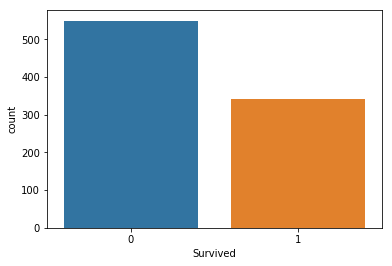

In [10]:
sns.countplot('Survived', data=train)

### Pclass

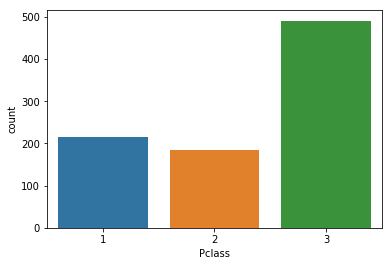

In [11]:
sns.countplot('Pclass', data=train)

### SibSp

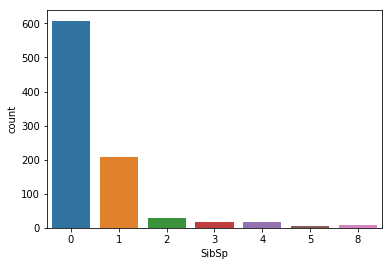

In [12]:
sns.countplot('SibSp', data=train)

### Parch

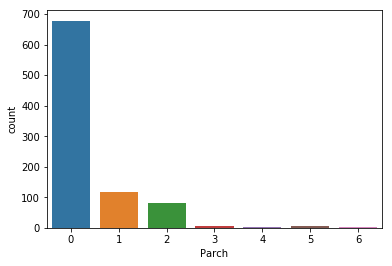

In [16]:
sns.countplot('Parch', data = train)

### Sex

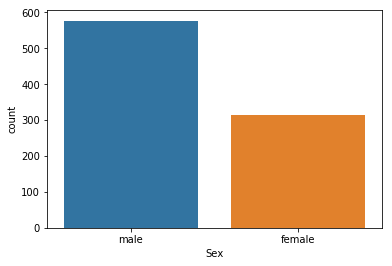

In [17]:
sns.countplot('Sex', data=train)

### Age

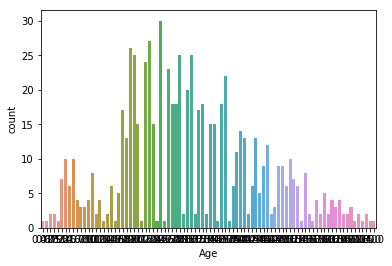

In [18]:
sns.countplot('Age', data=train)

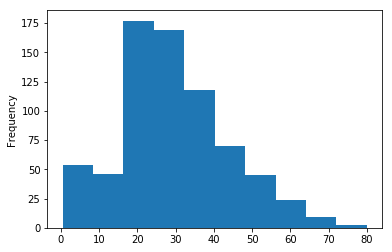

In [20]:
train['Age'].plot.hist()

### Fare

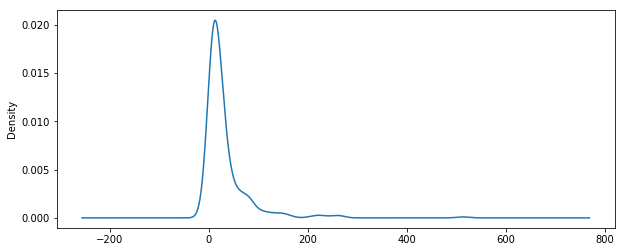

In [33]:
train['Fare'].plot(kind = 'density', figsize = (10, 4))

<a id='Bivariate-Analysis'></a>
## Bivariate Analysis 

### Sex and Survived

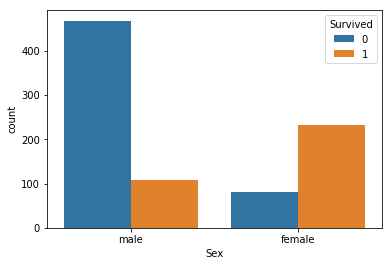

In [24]:
sns.countplot('Sex', data=train, hue='Survived')

### Pclass and Survived

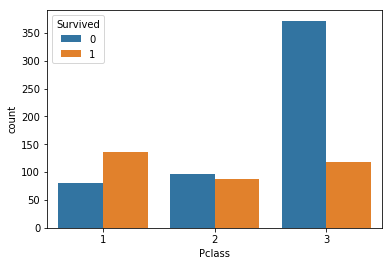

In [25]:
sns.countplot('Pclass', data=train, hue='Survived')

### SibSp and Survived

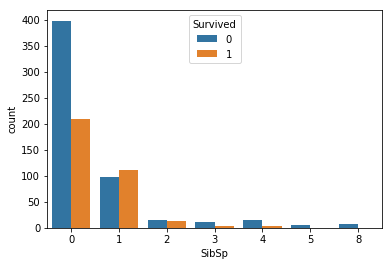

In [26]:
sns.countplot('SibSp', data=train, hue='Survived')

### Parch and Survived

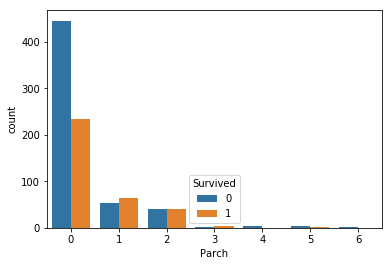

In [27]:
sns.countplot('Parch', data = train, hue='Survived')

### Embrak and Survived

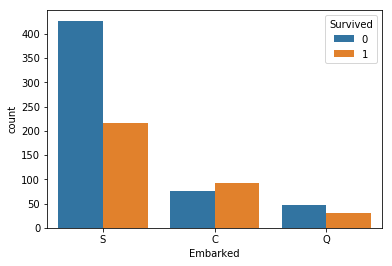

In [29]:
sns.countplot('Embarked', data = train, hue='Survived')

<a id='Bivariate-Analysis'></a>

# Multivariate

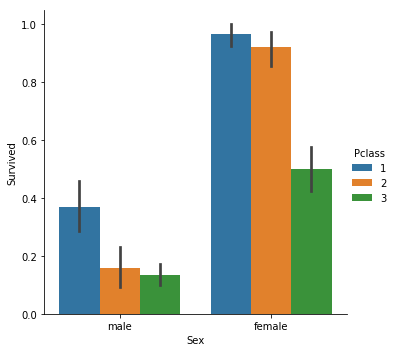

In [39]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train)

### Age

In [ ]:
suvival_by_age = ['Age', 'Survived']
age_data = train[suvival_by_age]
age_data["Age"] = age_data["Age"].fillna(-0.5)
age_data.head()

In [ ]:
# Creating Bins
bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
age_data['AgeGroup'] = pd.cut(age_data["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=age_data)
plt.show()